<div style='background-color:#443025; padding: 15px; border-radius: 5px;'>
<h1 style='color:#FEFEFE; text-align:center;'> Chocolate Sales Analysis – Data Analytics Project</h1>
</div>

---

<h2 style='color:#714737;'>Objectives</h2>

- Load and preprocess the Chocolate dataset.
- Clean the dataset by removing columns not required,standardise date column,normalise and convert columns where needed.
- Perform exploratory data analysis (EDA) to understand data distribution and relationships.



<h2 style='color:#714737;'>Inputs</h2>

- **Dataset:** kagglehub.dataset_download("atharvasoundankar/chocolate-sales")
- **Required Libraries:** Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, Plotly

- **Columns of Interest:** 'Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped'

 
  
<h2 style='color:#714737;'>Outputs</h2>

- **Cleaned dataset:** Processed dataset stored as a CSV file for analysis (`df_cleaned.csv`).
- **Exploratory Data Analysis (EDA):**
  - Understanding the data types and statistics in analysis.
  - Observing the distribution or features in column.
  - Identify outliers in numerical data.
  - Compare categorical variables with the target variable (Revenue Total).
- **Feature-engineered dataset:** Enhanced dataset with new derived features.
- **Insights & Summary Reports:** Key findings documented for further decision-making.

<h2 style='color:#714737;'>Additional Comments</h2>

- Ensure proper handling of missing, duplicated and outlier values to maintain data integrity.
- Remove names of sales persons to avoid ethical concerns as we are not using that data column.




<h2 style='color:#714737;'>Changing work directory</h2>

To run the notebook in the editor, the working directory needs to be changed from its current folder to its parent folder. Thus, we first access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/hafeezahfagbo/Chocolate-Sales-Analysis/jupyter_notebooks'

Then we make the parent of the current directory the new current directory by using:
  * os.path.dirname() to get the parent directory
  * os.chir() to define the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory.")

You set a new current directory.


Confirming the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/hafeezahfagbo/Chocolate-Sales-Analysis'

<h2 style='color:#714737;'>Importing Libraries and Packages</h2>

Loading Python packages that we will be using in this project to carry out the analysis. For example Numpy to compute numerical operations and handle arrays, Pandas for data manipulation and analysis, Matplotlib, Seaborn and Plotly to create different data visualisations

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
from scipy.stats import chi2_contingency, kurtosis, skew
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

---

<h2 style='color:#714737;'> Data Analysis</h2>

Loading the CSV dataset containing the data collected previously and extracting it into dataframe using pd.read_csv() function. Then using .head() to perview the dataset

In [5]:
df = pd.read_csv("Output/df_cleaned.csv")
df.head()

,Country,Product,Date,Amount,Boxes Shipped,Product Category,Month,Day,Month Name,Revenue per Box Shipped
0,UK,Mint Chip Choco,2022-01-04,5320.0,180,Flavored Chocolate,1,4,January,30.0
1,India,85% Dark Bars,2022-08-01,7896.0,94,Dark Chocolate,8,1,August,84.0
2,India,Peanut Butter Cubes,2022-07-07,4501.0,91,Nut-based Chocolate,7,7,July,49.0
3,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,Nut-based Chocolate,4,27,April,37.0
4,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,Nut-based Chocolate,2,24,February,74.0


<h2 style='color:#714737;'> Aggregate sales by country,product and product category</h2>

In [24]:
# Calculate total sales per country
total_sales_by_country = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

# Calculate total sales per product
total_sales_by_product = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

# Calculate total sales per product category
total_sales_by_category = df.groupby('Product Category')['Amount'].sum().sort_values(ascending=False)

# Print results
print("Total Sales by Country:")
print(total_sales_by_country)
print("\nTop 5 Products by Sales:")
print(total_sales_by_product.head())
print("\nTotal Sales by Product Category:")
print(total_sales_by_category)


Total Sales by Country:
Country
Australia      1137367.0
UK             1051792.0
India          1045800.0
USA            1035349.0
Canada          962899.0
New Zealand     950418.0
Name: Amount, dtype: float64

Top 5 Products by Sales:
Product
Smooth Sliky Salty     349692.0
50% Dark Bites         341712.0
White Choc             329147.0
Peanut Butter Cubes    324842.0
Eclairs                312445.0
Name: Amount, dtype: float64

Total Sales by Product Category:
Product Category
Flavored Chocolate        1864583.0
Specialty Chocolate       1724436.0
Dark Chocolate            1152347.0
Nut-based Chocolate        843864.0
Milk & White Chocolate     598395.0
Name: Amount, dtype: float64


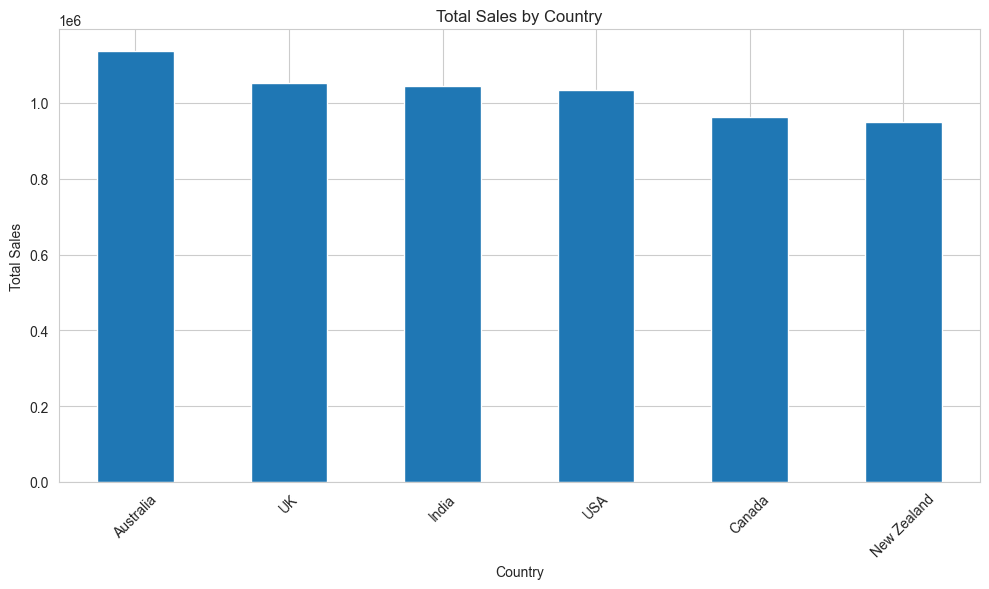

In [25]:

# Visualize total sales by country
plt.figure(figsize=(10, 6))
total_sales_by_country.plot(kind='bar')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

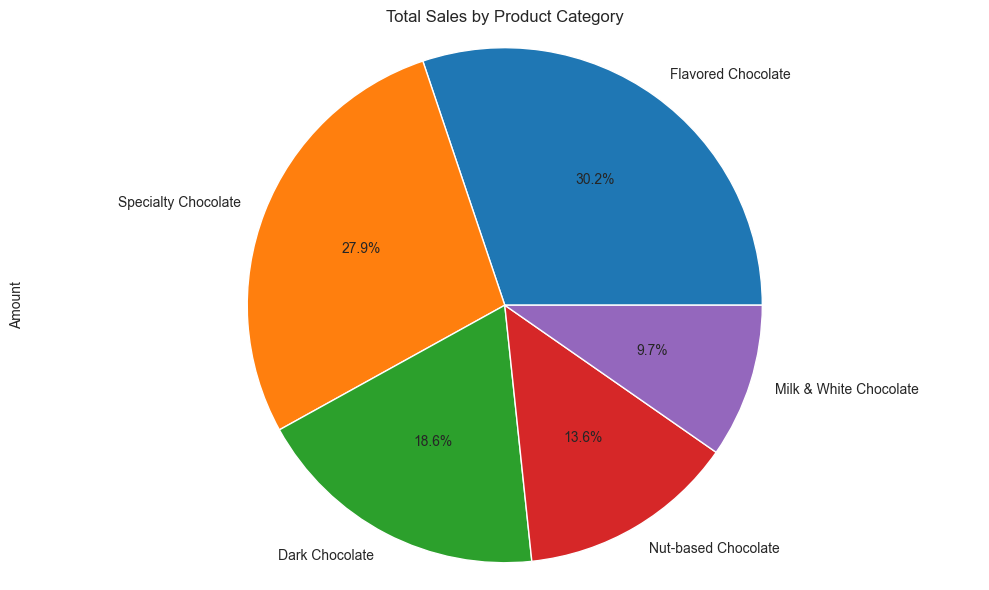

In [26]:
# Visualize total sales by product category
plt.figure(figsize=(10, 6))
total_sales_by_category.plot(kind='pie', autopct='%1.1f%%')
plt.title('Total Sales by Product Category')
plt.axis('equal')
plt.tight_layout()
plt.show()

<h2 style='color:#714737;'> Exploring and Transforming the Data</h2>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  1094 non-null   object 
 1   Product                  1094 non-null   object 
 2   Date                     1094 non-null   object 
 3   Amount                   1094 non-null   float64
 4   Boxes Shipped            1094 non-null   int64  
 5   Product Category         1094 non-null   object 
 6   Month                    1094 non-null   int64  
 7   Day                      1094 non-null   int64  
 8   Month Name               1094 non-null   object 
 9   Revenue per Box Shipped  1094 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 85.6+ KB


Getting list of Column names in dataset

In [7]:
df.columns.tolist()

['Country',
 'Product',
 'Date',
 'Amount',
 'Boxes Shipped',
 'Product Category',
 'Month',
 'Day',
 'Month Name',
 'Revenue per Box Shipped']

Checking each Column's datatype

In [8]:
df.dtypes

Country                     object
Product                     object
Date                        object
Amount                     float64
Boxes Shipped                int64
Product Category            object
Month                        int64
Day                          int64
Month Name                  object
Revenue per Box Shipped    float64
dtype: object

Then we will clean the data by removing sales person names column which we will not be using

In [9]:
df_cleaned = df.drop(columns=["Sales Person"], errors="ignore")
df_cleaned.head()

,Country,Product,Date,Amount,Boxes Shipped,Product Category,Month,Day,Month Name,Revenue per Box Shipped
0,UK,Mint Chip Choco,2022-01-04,5320.0,180,Flavored Chocolate,1,4,January,30.0
1,India,85% Dark Bars,2022-08-01,7896.0,94,Dark Chocolate,8,1,August,84.0
2,India,Peanut Butter Cubes,2022-07-07,4501.0,91,Nut-based Chocolate,7,7,July,49.0
3,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,Nut-based Chocolate,4,27,April,37.0
4,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,Nut-based Chocolate,2,24,February,74.0


Check for missing values

In [10]:
df_cleaned.isnull().sum()

Country                    0
Product                    0
Date                       0
Amount                     0
Boxes Shipped              0
Product Category           0
Month                      0
Day                        0
Month Name                 0
Revenue per Box Shipped    0
dtype: int64

Check for NAN or empty values

In [11]:
df_cleaned.dropna(axis=1, how='all')

,Country,Product,Date,Amount,Boxes Shipped,Product Category,Month,Day,Month Name,Revenue per Box Shipped
0,UK,Mint Chip Choco,2022-01-04,5320.0,180,Flavored Chocolate,1,4,January,30.0
1,India,85% Dark Bars,2022-08-01,7896.0,94,Dark Chocolate,8,1,August,84.0
2,India,Peanut Butter Cubes,2022-07-07,4501.0,91,Nut-based Chocolate,7,7,July,49.0
3,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,Nut-based Chocolate,4,27,April,37.0
4,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,Nut-based Chocolate,2,24,February,74.0
...,...,...,...,...,...,...,...,...,...,...
1089,Australia,Spicy Special Slims,2022-05-17,4410.0,323,Flavored Chocolate,5,17,May,14.0
1090,USA,White Choc,2022-06-07,6559.0,119,Milk & White Chocolate,6,7,June,55.0
1091,Canada,Organic Choco Syrup,2022-07-26,574.0,217,Specialty Chocolate,7,26,July,3.0
1092,India,Eclairs,2022-07-28,2086.0,384,Specialty Chocolate,7,28,July,5.0


Check for duplicate values

In [12]:
duplicate_check= df.duplicated().any()
print('There are duplicates:', duplicate_check)

There are duplicates: False


Check for unique values

In [13]:
unique_counts = df.nunique()
unique_table = pd.DataFrame({'Column': unique_counts.index, 'Unique Values': unique_counts.values})
unique_table

,Column,Unique Values
0,Country,6
1,Product,22
2,Date,168
3,Amount,827
4,Boxes Shipped,385
5,Product Category,5
6,Month,8
7,Day,31
8,Month Name,8
9,Revenue per Box Shipped,273


Check the distribution of the categorical variables (Country and Product) 

In [14]:
categorical_features = ['Country', 'Product']  
for col in categorical_features:
    print(f"\nFrequency counts for {col}:")
    print(df_cleaned[col].value_counts())


Frequency counts for Country:
Country
Australia      205
India          184
USA            179
UK             178
Canada         175
New Zealand    173
Name: count, dtype: int64

Frequency counts for Product:
Product
Eclairs                 60
50% Dark Bites          60
Smooth Sliky Salty      59
White Choc              58
Drinking Coco           56
Spicy Special Slims     54
Organic Choco Syrup     52
85% Dark Bars           50
Fruit & Nut Bars        50
After Nines             50
Peanut Butter Cubes     49
99% Dark & Pure         49
Milk Bars               49
Raspberry Choco         48
Almond Choco            48
Orange Choco            47
Mint Chip Choco         45
Manuka Honey Choco      45
Caramel Stuffed Bars    43
70% Dark Bites          42
Baker's Choco Chips     41
Choco Coated Almonds    39
Name: count, dtype: int64


Then convert the Amount column from dollars into numeric data type

In [15]:
# Convert Amount column to numeric by removing the "$" sign
df_cleaned["Amount"] = df_cleaned["Amount"].replace('[\$,]', '', regex=True).astype(float)


Standardize the dateformat by convert Date column to standard format (YYYY-MM-DD)

In [16]:
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"], format="%d-%b-%y", errors="coerce")

Check if all the changes have been made into the cleaned dataframe

In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Country                  1094 non-null   object        
 1   Product                  1094 non-null   object        
 2   Date                     0 non-null      datetime64[ns]
 3   Amount                   1094 non-null   float64       
 4   Boxes Shipped            1094 non-null   int64         
 5   Product Category         1094 non-null   object        
 6   Month                    1094 non-null   int64         
 7   Day                      1094 non-null   int64         
 8   Month Name               1094 non-null   object        
 9   Revenue per Box Shipped  1094 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 85.6+ KB


<h2 style='color:#714737;'> Advance Exploratory Data Analysis</h2>

Generate a summary of the statistics of the dataset for finding mean, median, total count of entries, standard deviation(std), minimum and maximum values

In [18]:
df_cleaned.describe()

,Date,Amount,Boxes Shipped,Month,Day,Revenue per Box Shipped
count,0,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,NaT,5652.308044,161.797989,4.576782,15.563985,105.730347
min,NaT,7.000000,1.000000,1.000000,1.000000,0.000000
25%,NaT,2390.500000,70.000000,3.000000,8.000000,15.000000
50%,NaT,4868.500000,135.000000,5.000000,15.000000,36.000000
75%,NaT,8027.250000,228.750000,7.000000,23.000000,78.750000
max,NaT,22050.000000,709.000000,8.000000,31.000000,4291.000000
std,NaN,4102.442014,121.544145,2.316465,8.624367,278.660667


Check for outliers and skewness of data distribution using skew() and kurtosis() statistical measures that describe the shape of a distribution. They help us understand how data points are spread and how they deviate from a normal distribution

In [19]:
# Select numerical columns
numerical_features = df_cleaned.select_dtypes(include=[float, int]).columns

# Calculate skewness and kurtosis
print("\nSkewness and Kurtosis for Numerical Features")
results = []
for col in numerical_features:
    col_skewness = skew(df_cleaned[col].dropna())  # Drop NaN values for calculation
    col_kurtosis = kurtosis(df_cleaned[col].dropna())  # Drop NaN values for calculation
    results.append({'Feature': col, 'Skewness': col_skewness, 'Kurtosis': col_kurtosis})

# Create a DataFrame to display the results neatly
result_df = pd.DataFrame(results)
result_df


Skewness and Kurtosis for Numerical Features


,Feature,Skewness,Kurtosis
0,Amount,0.891005,0.445925
1,Boxes Shipped,1.111052,1.153670
2,Month,-0.109683,-1.247971
3,Day,0.054493,-1.162130
4,Revenue per Box Shipped,7.530299,77.246422


As there are 22 products, we are going to divide them by Product Category

In [20]:
# Define product categories
product_categories = {
    "Dark Chocolate": [
        "99% Dark & Pure", "85% Dark Bars", "70% Dark Bites", "50% Dark Bites"
    ],
    "Milk & White Chocolate": [
        "Milk Bars", "White Choc"
    ],
    "Flavored Chocolate": [
        "Mint Chip Choco", "Orange Choco", "Raspberry Choco", "Fruit & Nut Bars",
        "Spicy Special Slims", "Caramel Stuffed Bars", "Manuka Honey Choco"
    ],
    "Nut-based Chocolate": [
        "Peanut Butter Cubes", "Almond Choco", "Choco Coated Almonds"
    ],
    "Specialty Chocolate": [
        "Smooth Sliky Salty", "After Nines", "Eclairs", "Organic Choco Syrup",
        "Drinking Coco", "Baker's Choco Chips"
    ]
}
# Function to assign categories
def categorize_product(product):
    for category, products in product_categories.items():
        if product in products:
            return category
    return "Other"  # In case a new product appears
# Apply the function to create a new category column
df_cleaned["Product Category"] = df_cleaned["Product"].apply(categorize_product)
df_cleaned.head()

,Country,Product,Date,Amount,Boxes Shipped,Product Category,Month,Day,Month Name,Revenue per Box Shipped
0,UK,Mint Chip Choco,NaT,5320.0,180,Flavored Chocolate,1,4,January,30.0
1,India,85% Dark Bars,NaT,7896.0,94,Dark Chocolate,8,1,August,84.0
2,India,Peanut Butter Cubes,NaT,4501.0,91,Nut-based Chocolate,7,7,July,49.0
3,Australia,Peanut Butter Cubes,NaT,12726.0,342,Nut-based Chocolate,4,27,April,37.0
4,UK,Peanut Butter Cubes,NaT,13685.0,184,Nut-based Chocolate,2,24,February,74.0


Create new columns for day, month number and month name

In [21]:
# Extract month and day from the Date column
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['Day'] = df_cleaned['Date'].dt.day
df_cleaned['Month Name'] = df_cleaned['Date'].dt.strftime('%B')

# Display the updated dataframe
df_cleaned.head()

,Country,Product,Date,Amount,Boxes Shipped,Product Category,Month,Day,Month Name,Revenue per Box Shipped
0,UK,Mint Chip Choco,NaT,5320.0,180,Flavored Chocolate,NaN,NaN,NaN,30.0
1,India,85% Dark Bars,NaT,7896.0,94,Dark Chocolate,NaN,NaN,NaN,84.0
2,India,Peanut Butter Cubes,NaT,4501.0,91,Nut-based Chocolate,NaN,NaN,NaN,49.0
3,Australia,Peanut Butter Cubes,NaT,12726.0,342,Nut-based Chocolate,NaN,NaN,NaN,37.0
4,UK,Peanut Butter Cubes,NaT,13685.0,184,Nut-based Chocolate,NaN,NaN,NaN,74.0


Creating a Revenue per Box Shipped metric (Amount / Boxes Shipped)

In [22]:
# Create a new column for Revenue per Box Shipped
df_cleaned['Revenue per Box Shipped'] = np.round(df_cleaned['Amount'] / df_cleaned['Boxes Shipped'])

# Display the updated dataframe
df_cleaned.head()

,Country,Product,Date,Amount,Boxes Shipped,Product Category,Month,Day,Month Name,Revenue per Box Shipped
0,UK,Mint Chip Choco,NaT,5320.0,180,Flavored Chocolate,NaN,NaN,NaN,30.0
1,India,85% Dark Bars,NaT,7896.0,94,Dark Chocolate,NaN,NaN,NaN,84.0
2,India,Peanut Butter Cubes,NaT,4501.0,91,Nut-based Chocolate,NaN,NaN,NaN,49.0
3,Australia,Peanut Butter Cubes,NaT,12726.0,342,Nut-based Chocolate,NaN,NaN,NaN,37.0
4,UK,Peanut Butter Cubes,NaT,13685.0,184,Nut-based Chocolate,NaN,NaN,NaN,74.0


The data has been cleaned and ready to load. This will be saved into a csv file for further analysis

<h2 style='color:#714737;'> Loading</h2>

In [23]:
# Save the cleaned dataset to a CSV file
df_cleaned.to_csv("Output/df_cleaned.csv", index=False)